 # Business Context

The company ISketch located in São Paulo, manufactures and provides software focused on the development of 3D projects for civil construction, as a way of prototyping large projects. 

To use the software, the customer needs a user license that is renewed annually.

One of the company's best customer acquisition strategies is capturing customers' e-mails in exchange for a newsletter with weekly content on civil construction.Subscribing to the Newsletters allows starting a relationship between ISketch and people, in order to show the advantages of using the software to create civil construction prototypes. 

Therefore, improving the conversion of the e-mail capture page, offering the newsletter in exchange, is crucial for increasing the number of customers.

Therefore, the company's Marketing coordinator asked the team of designers to create a new email capture page with a small change in the colors of the “sign up” button, in order to increase page conversion.

The design team created a page with a red sign up button to test against the current page with a blue sign up button. The Marketing coordinator is in a hurry to test the new page, as the company has been acquiring few customers in recent weeks and this could compromise the company's annual revenue.

The company's team of data scientists was called in with the mission to test the new email capture page as soon as possible. 

The first idea was to plan an A/B test experiment between the two pages over a period of 7 days, to conclude the affectivity of the button color changes. However, the Marketing coordinator categorically told the data team that he couldn't wait 7 days and requested that I complete it in less time.

# Business Challange



I was assigned to the validation project in the new page layout, along with the marketing team, in order to help evaluate the new capture page. The Marketing team hopes that you will be able to conclude whether the conversion of the new page is really better, worse or equal to the conversion of the current page and in less than seven days.


# Solution Planning

1.0 Apply the method IOT.
Imput:
- Dataset;
- Business Plan;
    
Tesks:

    - Hyphotesis Tests;
    - Define the type of statistical inference method ( ANOVA, T-Test, Chi-Squared);
    - Experiment Planning: Hyphotesis, Sample size, Expected Effect.

Output:

    - Text.  
    
- 1.0 Experiment Designer;
- 2.0 Criate Hyphotesis to test;
- 3.0 Define a metric;
- 4.0 load the dataset;
- 5.0 Data cleaning;
- 6.0 Descriptive Analysis;
- 7.0 Exploratory Data Anaysis;
- 8.0 Hyphotesis Test( apply a test tecnic of statistical inference);
- 9.0 Conclusion;
- 10.0 Sugest which is the best variation.

# APP.py

# 0.1 Imports


In [133]:
import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt
from matplotlib import gridspec


# 1.0. Create dataset

In [134]:
df_raw_A = {
        'visits_A': [24186, 22240, 21915, 24046, 21620, 21651, 22624, 25476, 24232, 26996, 24418, 26906,
                     21262, 20247, 21377, 24754, 23289, 21968, 21819, 20614, 18778, 16136, 19584, 16925, 
                     23675, 26319, 20691, 24725, 25090, 26551, 24389, 23229, 24359, 21501, 24459, 23413,
                     21180, 19490, 28164, 25076, 25819, 26386, 26784, 23879, 24669, 20815, 22421, 25605, 
                     24855, 20280, 22752, 21237, 26087, 25624, 23902, 21089, 19599, 21535, 25220, 22885, 
                     25755, 25270, 23617, 19612, 21427, 27168, 22962, 24776, 23591,
716],

        'clicks_A': [1642, 1660, 1728, 1878, 1234, 1320, 1826, 2768, 2940, 3016, 2060,3072, 1984, 1544,
                     1410, 1294, 2096, 1518, 3646, 1954, 1968, 1430, 1254, 1778, 2072, 2248, 2222, 1184,
                     1170, 1496, 1372, 2278, 2314, 2284, 1452, 1810, 2162, 1366, 1262, 1022, 1444, 1114,
                     1688, 2362, 1210, 2146, 2100, 2794, 2064, 1886, 1732, 2878, 1700, 1642, 1558, 1148, 
                     1282, 1264, 1568, 2254, 1416, 1682, 1152, 1540, 1270, 1848, 1928, 1464, 1746, 62]
        
        }


df_raw_B = {
        'visits_B': [24909, 22986, 22953, 24896, 22284, 22563, 23196, 26238, 24871, 27869, 25301, 27779, 
                     22008, 21020, 22037, 25518, 24043, 22593, 22195, 21015, 19337, 16672, 20329, 17638, 
                     24427, 27232, 21468, 25487, 25926, 27237, 25163, 23965, 25037, 22336, 25271, 24220,
                     22014, 20195, 29069, 25992, 26678, 26949, 27701, 24951, 25561, 21441, 23269, 26265,
                     25563, 20869, 23276,22006, 27070, 26169, 24448, 21765, 19933, 21966, 25987, 23607,
                     26214, 25999, 24272, 20320, 22058, 28055, 23766, 25646, 24677, 707],

        'clicks_B': [1714, 1778, 1848, 2008, 1270, 1372, 1868, 2872, 3014, 3110, 2094, 3278, 1982, 1648,
                     1476, 1336, 2108, 1602, 3766, 2000, 1950, 1534, 1418, 1790, 2180, 2574, 2348, 1280, 
                     1136, 1500, 1362, 2582, 2326, 2386, 1540, 1892, 2160, 1418, 1252, 1078, 1550, 1156,
                     1860, 2288, 1228, 2320, 2166, 3010, 2010, 1928, 1890, 2960, 1716, 1796, 1522, 1224, 
                     1346, 1350, 1534, 2436, 1404, 1824, 1162, 1586, 1390, 1950, 2020, 1484, 1818, 60]
            }

In [135]:
df = pd.concat([pd.DataFrame(df_raw_A), pd.DataFrame(df_raw_B)], axis=1)
df.head()

,visits_A,clicks_A,visits_B,clicks_B
0,24186,1642,24909,1714
1,22240,1660,22986,1778
2,21915,1728,22953,1848
3,24046,1878,24896,2008
4,21620,1234,22284,1270


# 2.0 A | B Frequency

In [136]:
df['acc_visits_A'] = np.cumsum(df['visits_A'])
df['acc_visits_B'] = np.cumsum(df['visits_B'])

df['acc_clicks_A'] = np.cumsum(df['clicks_A'])
df['acc_clicks_B'] = np.cumsum(df['clicks_B'])

df['convertion'] = ( df['clicks_A'] + df['clicks_B']) / ( df['visits_A'] + df['visits_B'] ) 

In [137]:
numerador = (df['acc_clicks_B'] / df['acc_visits_B']) - (df['acc_clicks_A'] / df['acc_visits_A'])
denominador = np.sqrt((df['convertion'] * ( 1 - df['convertion'])) * ((1/ df['acc_visits_A']) + (1/df['acc_visits_B'])))
df['z'] = numerador / denominador
df.head()

,visits_A,clicks_A,visits_B,clicks_B,acc_visits_A,acc_visits_B,acc_clicks_A,acc_clicks_B,convertion,z
0,24186,1642,24909,1714,24186,24909,1642,1714,0.068357,0.403823
1,22240,1660,22986,1778,46426,47895,3302,3492,0.076018,1.034435
2,21915,1728,22953,1848,68341,70848,5030,5340,0.079700,1.219713
3,24046,1878,24896,2008,92387,95744,6908,7348,0.079400,1.583106
4,21620,1234,22284,1270,114007,118028,8142,8618,0.057034,1.661355


In [138]:
df['ctr_A'] = ( df['acc_clicks_A'] / df['acc_visits_A'] )
df['ctr_B'] = ( df['acc_clicks_B'] / df['acc_visits_B'] )

df['acc_ctr_A'] = df['ctr_A'].cumsum()
df['acc_ctr_B'] = df['ctr_B'].cumsum()
df.head()

,visits_A,clicks_A,visits_B,clicks_B,acc_visits_A,acc_visits_B,acc_clicks_A,acc_clicks_B,convertion,z,ctr_A,ctr_B,acc_ctr_A,acc_ctr_B
0,24186,1642,24909,1714,24186,24909,1642,1714,0.068357,0.403823,0.067891,0.068810,0.067891,0.068810
1,22240,1660,22986,1778,46426,47895,3302,3492,0.076018,1.034435,0.071124,0.072909,0.139014,0.141720
2,21915,1728,22953,1848,68341,70848,5030,5340,0.079700,1.219713,0.073601,0.075373,0.212616,0.217093
3,24046,1878,24896,2008,92387,95744,6908,7348,0.079400,1.583106,0.074772,0.076746,0.287388,0.293839
4,21620,1234,22284,1270,114007,118028,8142,8618,0.057034,1.661355,0.071417,0.073017,0.358805,0.366855


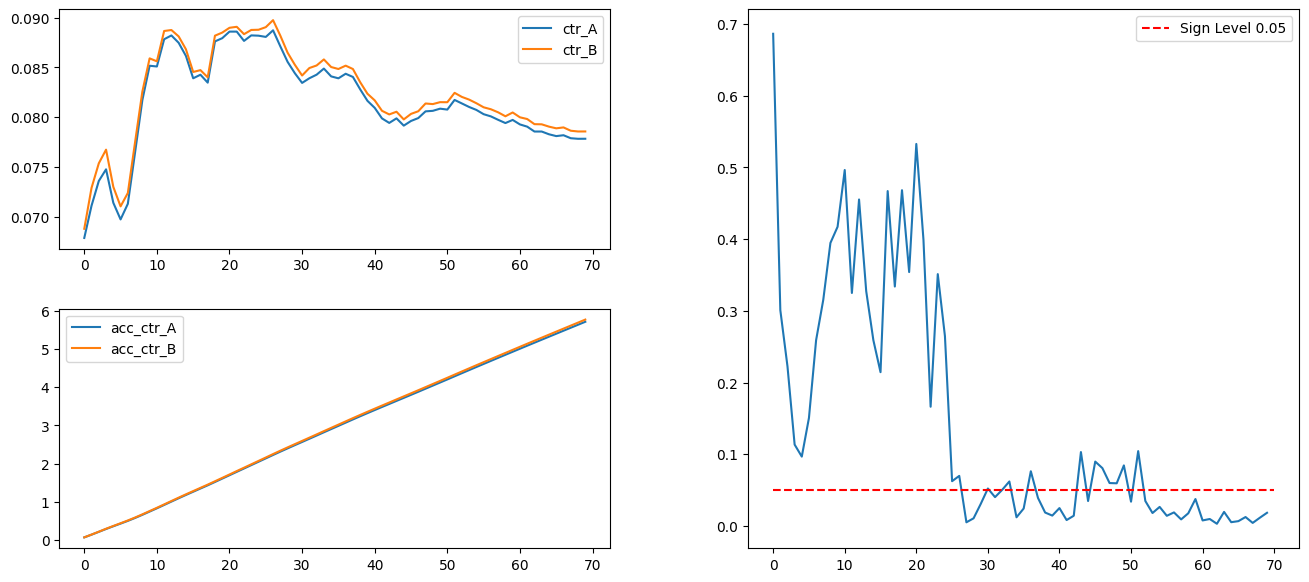

In [139]:
f = plt.figure( figsize=(16,7) )
gs0 = gridspec.GridSpec( 2, 2, figure=f, wspace=0.25, hspace=0.25 )

ax1 = f.add_subplot( gs0[:1, :1])
ax2 = f.add_subplot( gs0[1:, :1])
ax3 = f.add_subplot( gs0[:, 1:])

ax1.plot( df['ctr_A'], label = 'ctr_A')
ax1.plot( df['ctr_B'], label = 'ctr_B')
ax1.legend()

ax2.plot( df['acc_ctr_A'], label = 'acc_ctr_A')
ax2.plot( df['acc_ctr_B'], label = 'acc_ctr_B')
ax2.legend()

ax3.plot( df['z'].index, ( 2 * (1 - stats.norm.cdf( df['z'] ) )  ) )
ax3.hlines( 0.05, 0, 70, color ='red', linestyle = '--' , label = 'Sign Level 0.05' )
ax3.legend()

# 3.0  A|B Bayesian

In [140]:
# Quantidade de amostras
N_mc = 100000
df1 = df.copy()

In [141]:
proba_b_better_a = []
expected_loss_a = []
expected_loss_b = []
for day in range(len(df1)):
        
    u_a, var_a = stats.beta.stats( a= 1+ df1.loc[day, 'acc_clicks_A'],
                                b= 1 + (df1.loc[day, 'acc_visits_A'] - df1.loc[day, 'acc_clicks_A']),
                                moments= 'mv')

    u_b, var_b = stats.beta.stats( a= 1+ df1.loc[day, 'acc_clicks_B'],
                                b= 1 + (df1.loc[day, 'acc_visits_B'] - df1.loc[day, 'acc_clicks_B']),
                                moments= 'mv')

    # Amostras da distribuição normal A
    x_a = np.random.normal( loc = u_a,
                            scale = 1.25*np.sqrt( var_a ),
                            size = N_mc)

    # Amostras da distribuição normal B
    x_b = np.random.normal( loc = u_b,
                            scale = 1.25*np.sqrt( var_b ),
                            size = N_mc)

    #Distribuição beta da página A
    fa = stats.beta.pdf( x_a,
                        a = 1 + df1.loc[day, 'acc_clicks_A'],
                        b = 1 + (df1.loc[day, 'acc_visits_A'] - df1.loc[day, 'acc_clicks_A']))

    #Distribuição beta da página B
    fb = stats.beta.pdf( x_b,
                        a = 1 + df1.loc[day, 'acc_clicks_B'],
                        b = 1 + (df1.loc[day, 'acc_visits_B'] - df1.loc[day, 'acc_clicks_B']))

    #Distribuição normal da página A
    ga = stats.norm.pdf( x_a,
                        loc = u_a,
                        scale = 1.25*np.sqrt(var_a))

    #Distribuição normal da página B
    gb = stats.norm.pdf( x_b,
                        loc = u_b,
                        scale = 1.25*np.sqrt(var_b))

    # Beta/Normal
    y = (fa*fb) / (ga*gb)

    # Somente valores onde o B é maior do que A
    yb = y[x_b >= x_a]

    #probabilidade de B ser melhor que A
    p = ( 1 / N_mc)*np.sum(yb)

    # Erro ao assumir B melhor que A
    expected_loss_A = ( 1/N_mc ) * np.sum(((x_b - x_a)*y)[x_b >= x_a]) 
    expected_loss_B = ( 1/N_mc ) * np.sum(((x_a - x_b)*y)[x_a >= x_b]) 

    proba_b_better_a.append( p )
    expected_loss_a.append(expected_loss_A)
    expected_loss_b.append(expected_loss_B)

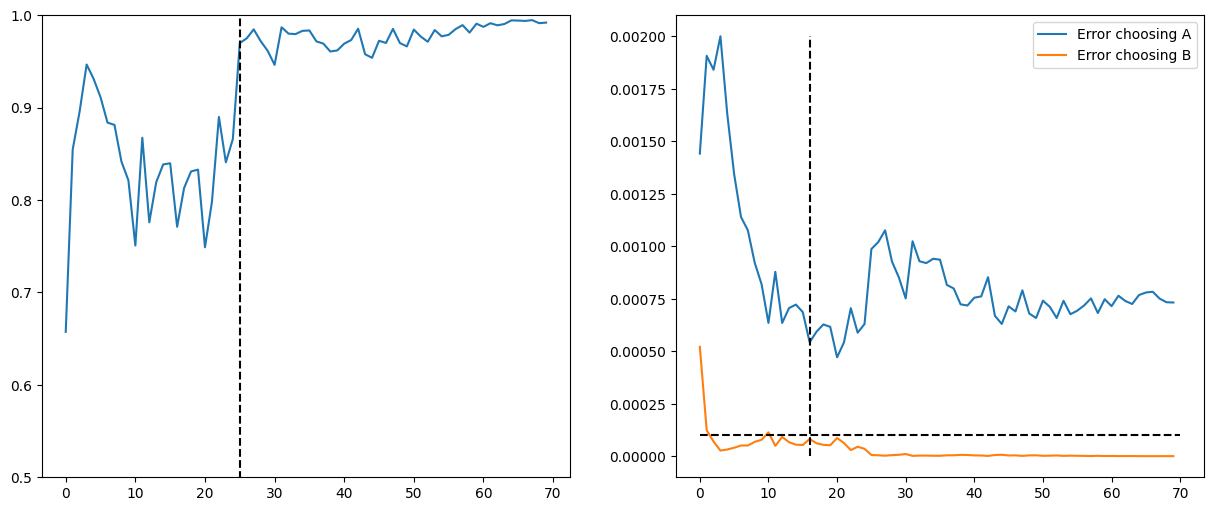

In [146]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].set_ylim( 0.5, 1 )
axs[0].plot(proba_b_better_a)
axs[0].vlines( 25, 0, 1.0, color='black', linestyle='--');

axs[1].plot( expected_loss_a, label='Error choosing A')
axs[1].plot( expected_loss_b, label='Error choosing B');
axs[1].hlines( 0.0001, 0, 70, color='black', linestyle='--');
axs[1].vlines( 16, 0, 0.00200, color='black', linestyle='--');
plt.legend()

In [143]:
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

def bayesian_inference(data):
    N_mc = 10000
    proba_b_better_a = []
    expected_loss_a = []
    expected_loss_b = []
    for day in range(len(data)):
            
        u_a, var_a = stats.beta.stats( a= 1+ data.loc[day, 'acc_clicks_A'],
                                    b= 1 + (data.loc[day, 'acc_visits_A'] - data.loc[day, 'acc_clicks_A']),
                                    moments= 'mv')

        u_b, var_b = stats.beta.stats( a= 1+ data.loc[day, 'acc_clicks_B'],
                                    b= 1 + (data.loc[day, 'acc_visits_B'] - data.loc[day, 'acc_clicks_B']),
                                    moments= 'mv')

        # Amostras da distribuição normal A
        x_a = np.random.normal( loc = u_a,
                                scale = 1.25*np.sqrt( var_a ),
                                size = N_mc)

        # Amostras da distribuição normal B
        x_b = np.random.normal( loc = u_b,
                                scale = 1.25*np.sqrt( var_b ),
                                size = N_mc)

        #Distribuição beta da página A
        fa = stats.beta.pdf( x_a,
                            a = 1 + data.loc[day, 'acc_clicks_A'],
                            b = 1 + (data.loc[day, 'acc_visits_A'] - data.loc[day, 'acc_clicks_A']))

        #Distribuição beta da página B
        fb = stats.beta.pdf( x_b,
                            a = 1 + data.loc[day, 'acc_clicks_B'],
                            b = 1 + (data.loc[day, 'acc_visits_B'] - data.loc[day, 'acc_clicks_B']))

        #Distribuição normal da página A
        ga = stats.norm.pdf( x_a,
                            loc = u_a,
                            scale = 1.25*np.sqrt(var_a))

        #Distribuição normal da página B
        gb = stats.norm.pdf( x_b,
                            loc = u_b,
                            scale = 1.25*np.sqrt(var_b))

        # Beta/Normal
        y = (fa*fb) / (ga*gb)

        # Somente valores onde o B é maior do que A
        yb = y[x_b >= x_a]

        #probabilidade de B ser melhor que A
        p = ( 1 / N_mc)*np.sum(yb)

        # Erro ao assumir B melhor que A
        expected_loss_A = ( 1/N_mc ) * np.sum(((x_b - x_a)*y)[x_b >= x_a]) 
        expected_loss_B = ( 1/N_mc ) * np.sum(((x_a - x_b)*y)[x_a >= x_b]) 

        proba_b_better_a.append( p )
        expected_loss_a.append(expected_loss_A)
        expected_loss_b.append(expected_loss_B)

    return proba_b_better_a, expected_loss_a, expected_loss_b

def animate(i):
    data = pd.read_csv('../data_experiment.csv')

    #dtypes
    data['click'] = data['click'].astype(int)
    data['visit'] = data['visit'].astype(int)

    # pivot table
    data = data.drop(columns={' '})
    data = data.reset_index().rename(columns={"index": "day"})
    data = data.pivot(index='day', columns='group', values=['click', 'visit']).fillna(0)
    data.columns = ['click_control', 'click_treatment', 'visit_control', 'visit_treatment']
    data = data.reset_index( drop=True )

    data['acc_visits_A'] = np.cumsum(data['visit_control'])
    data['acc_visits_B'] = np.cumsum(data['visit_treatment'])

    data['acc_clicks_A'] = np.cumsum(data['click_control'])
    data['acc_clicks_B'] = np.cumsum(data['click_treatment'])

    #inference bayesion
    proba_b_better_a, expected_loss_a, expected_loss_b = bayesian_inference(data)

    x1 = np.arange( len(proba_b_better_a))
    
    plt.cla()
    plt.plot( x1, proba_b_better_a, label='Probability B better A')
    plt.plot( x1, expected_loss_a, label='Risk choosing A')
    plt.plot( x1, expected_loss_b, label='Risk choosing B')
    plt.legend(loc='upper right')
    plt.tight_layout()
    print( i )



ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

/Users/adriele/opt/anaconda3/envs/env_abtesting/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

,click_control,click_treatment,visit_control,visit_treatment,acc_visits_A,acc_visits_B,acc_clicks_A,acc_clicks_B
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0
3,0.0,1.0,0.0,1.0,3.0,1.0,2.0,1.0
4,0.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0


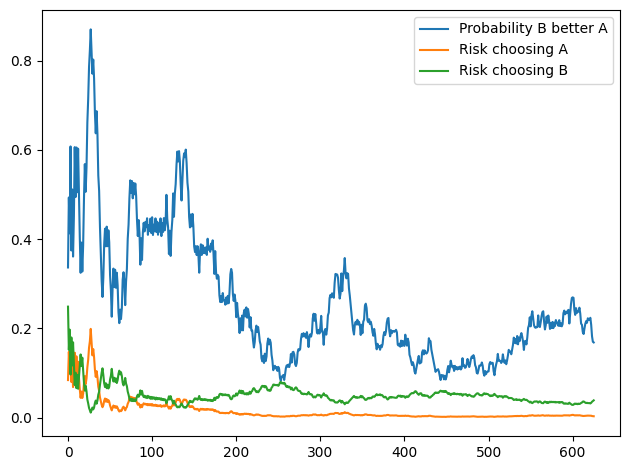

In [130]:
data = pd.read_csv('/Users/adriele/Documents/repos/ab_testing/testes/bayesian_test/data_experiment.csv')

#dtypes
data['click'] = data['click'].astype(int)
data['visit'] = data['visit'].astype(int)

# pivot table
#data = data.drop(columns={' '})
data = data.reset_index().rename(columns={"index": "day"})
data = data.pivot(index='day', columns='group', values=['click', 'visit']).fillna(0)
data.columns = ['click_control', 'click_treatment', 'visit_control', 'visit_treatment']
data = data.reset_index( drop=True )

data['acc_visits_A'] = np.cumsum(data['visit_control'])
data['acc_visits_B'] = np.cumsum(data['visit_treatment'])

data['acc_clicks_A'] = np.cumsum(data['click_control'])
data['acc_clicks_B'] = np.cumsum(data['click_treatment'])

#inference bayesion
proba_b_better_a, expected_loss_a, expected_loss_b = bayesian_inference(data)

x1 = np.arange( len(proba_b_better_a))

plt.cla()
plt.plot( x1, proba_b_better_a, label='Probability B better A')
plt.plot( x1, expected_loss_a, label='Risk choosing A')
plt.plot( x1, expected_loss_b, label='Risk choosing B')
plt.legend(loc='upper right')
plt.tight_layout()

data.head()